In [78]:
# Data Manipulation

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
# Visualization
import folium 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline 
# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from yellowbrick.cluster import SilhouetteVisualizer

# Battle of the Neighborhoods: Seattle Neighborhood Clustering

## Link Reference:
1. Data Acqusition: https://github.com/JoeBattafarano/Battle-of-the-Neighborhoods/blob/master/Data_Acqusition.ipynb
2. ***Data Preparation, Exploration, and Analysis: https://github.com/JoeBattafarano/Battle-of-the-Neighborhoods/blob/master/Data_Acqusition.ipynb***
3. Report: https://github.com/JoeBattafarano/Battle-of-the-Neighborhoods/blob/master/Seattle-Neighborhood-Clustering.docx
4. Presentation: https://github.com/JoeBattafarano/Battle-of-the-Neighborhoods/blob/master/Seattle-Neighborhood-Clustering.pptx

## Data Preparation, Exploration, and Analysis:
* [Data Importing and Overview](#over)
* [Pricing and Rating Exploration](#PnRe)
* [K-Means Clustering - Neighborhoods](#neigh)
* [K-Means Clustering - Price and Rating](#PnR)

## Data Importing and Overview <a name='over'></a>

In [2]:
# Bringing in the Data:

#Seattle Neighborhoods
sn = pd.read_csv('sn.csv')
# Venue data
seattle_venues = pd.read_csv('seattle_venues.csv')
# 5 details' files 
seattle_venues_details_1 = pd.read_csv('first_seattle_venues_details.csv')
seattle_venues_details_2 = pd.read_csv('second_seattle_venues_details.csv')
seattle_venues_details_3 = pd.read_csv('third_seattle_venues_details.csv')
seattle_venues_details_4 = pd.read_csv('fourth_seattle_venues_details.csv')
seattle_venues_details_5 = pd.read_csv('fifth_seattle_venues_details.csv')
# Concat into one main
seattle_venues_details = pd.concat([seattle_venues_details_1,seattle_venues_details_2,seattle_venues_details_3,seattle_venues_details_4,seattle_venues_details_5], ignore_index=True)

In [3]:
# Remove unwanted column
seattle_venues_details.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
# Looks good so we shall merge the venues and their details via venue id
seattle_venues_complete = seattle_venues.merge(seattle_venues_details, on='id',how='left')
seattle_venues_complete.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
# Checking if each neighborhood returned venues
# It appears one Neighborhood did not return any venues
print('There are {} uniques venues.'.format(len(seattle_venues['Neighborhood'].unique())))
print('There are {} uniques venues.'.format(len(sn['Neighborhood'].unique())))

There are 118 uniques venues.
There are 119 uniques venues.


In [6]:
# Since they did not identifying which neighborhood did not return venues
venues_neighborhoods = seattle_venues['Neighborhood'].unique()
sn_neighborhoods = sn['Neighborhood'].unique()
np.in1d(sn_neighborhoods,venues_neighborhoods)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [7]:
# It happens to be element 98. Therefore, we shall remove it
sn.drop([98], inplace=True)
sn.reset_index(inplace=True,drop=True)
# Dropping unwanted columns:
seattle_venues.drop(['Unnamed: 0','id'],axis=1, inplace=True)
sn.drop(['Unnamed: 0'],axis=1, inplace=True)

# General Information:

In [8]:
# Neighborhoods
print('There are {} unique neighborhoods.'.format(len(sn['Neighborhood'].unique())))
# Venues
print('There are {} venues.'.format(len(seattle_venues_complete)))
print('There are {} unique venues.'.format(len(seattle_venues_complete['id'].unique())))
print('There are {} unique venue categories.'.format(len(seattle_venues_complete['Venue Category'].unique())))

There are 118 unique neighborhoods.
There are 3370 venues.
There are 2285 unique venues.
There are 311 unique venue categories.


# Price and Rating Exploration <a name='PnRe'></a>

In [9]:
# Used only unique venues so you don't repeat counts in  price and rating
# seattle_venues_unique = seattle_venues_complete.drop_duplicates(subset = 'id')
seattle_venues_price = seattle_venues_complete[seattle_venues_complete['price'] != 0]
seattle_venues_rating = seattle_venues_complete[seattle_venues_complete['rating'] != 0.0]
seattle_venues_PnR = seattle_venues_price.merge(seattle_venues_rating, on='id', how='inner')
seattle_venues_PnR.drop(['Neighborhood_x','Neighborhood Latitude_x','Neighborhood Longitude_x','Venue_x','Venue Latitude_x','Venue Longitude_x','Venue Category_x','price_x','rating_x'],axis=1,inplace=True)
seattle_venues_PnR = seattle_venues_PnR.rename(columns={'Neighborhood_y':'Neighborhood','Neighborhood Latitude_y':'Neighborhood Latitude','Neighborhood Longitude_y':'Neighborhood Longitude','Venue_y':'Venue','Venue Latitude_y':'Venue Latitude','Venue Longitude_y':'Venue Longitude', 'Venue Category_y':'Venue Category','price_y':'Venue Price','rating_y':'Venue Rating','id':'Venue ID'})
seattle_venues_PnR = seattle_venues_PnR.drop_duplicates(subset = ['Venue ID','Neighborhood'])

In [10]:
seattle_venues_PnR

,Venue ID,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Price,Venue Rating
0,5b538f7e2b9844002ca8dde6,North Seattle,47.660773,-122.291497,Burke-Gilman Brewing Company,47.661308,-122.288067,Brewery,2,8.2
1,5b538f7e2b9844002ca8dde6,North College Park,47.660773,-122.291497,Burke-Gilman Brewing Company,47.661308,-122.288067,Brewery,2,8.2
4,4abc357af964a520c98620e3,North Seattle,47.660773,-122.291497,Jak's Grill,47.661072,-122.288073,Steakhouse,3,8.0
5,4abc357af964a520c98620e3,North College Park,47.660773,-122.291497,Jak's Grill,47.661072,-122.288073,Steakhouse,3,8.0
8,4af5ed48f964a520eafe21e3,North Seattle,47.660773,-122.291497,Baskin-Robbins,47.661336,-122.292004,Ice Cream Shop,1,7.4
...,...,...,...,...,...,...,...,...,...,...
3917,4c55d62006901b8d3129244e,Roxhill,47.519214,-122.368599,Starbucks,47.516686,-122.366630,Coffee Shop,1,6.9
3918,4cf008093b03f04df03042dc,Roxhill,47.519214,-122.368599,Subshop #182,47.522499,-122.365493,Sandwich Place,1,7.3
3919,57a6a800cd1007d199bc3908,Roxhill,47.519214,-122.368599,Wingstop,47.522666,-122.366792,Wings Joint,2,6.8
3920,4a451ff5f964a520d6a71fe3,Roxhill,47.519214,-122.368599,Starbucks,47.522233,-122.365665,Coffee Shop,1,7.0


## Price

In [11]:
# Look at unique only
seattle_venues_price = seattle_venues_price.drop_duplicates(subset='id')
seattle_venues_price.groupby('price').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category,rating
price,,,,,,,,,
1,613,613,613,613,613,613,613,613,613
2,492,492,492,492,492,492,492,492,492
3,94,94,94,94,94,94,94,94,94
4,12,12,12,12,12,12,12,12,12


In [12]:
# Obtaining the # of venues with each unique price tier
prices = [1,2,3,4]
price_totals = [613,492,94,12]

<BarContainer object of 4 artists>

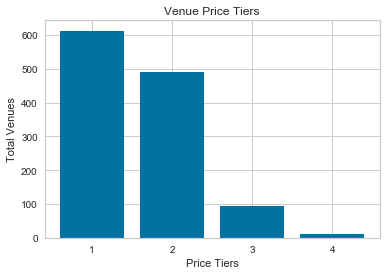

In [13]:
# Price Tier Amounts
plt.xticks(prices)
plt.ylabel('Total Venues')
plt.xlabel('Price Tiers')
plt.title('Venue Price Tiers')
plt.bar(prices,price_totals)

## Rating

In [14]:
# Only use unique
# Looking and descriptive stats to identify skew and distribution
seattle_venues_rating = seattle_venues_rating.drop_duplicates(subset='id')
seattle_venues_rating.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,price,rating
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,47.629476,-122.329252,47.629248,-122.329435,0.946032,7.645344
std,0.041346,0.026015,0.041268,0.026134,0.944319,0.877947
min,47.519214,-122.420797,47.516686,-122.418899,0.000000,5.300000
25%,47.609305,-122.345361,47.608549,-122.343834,0.000000,7.000000
50%,47.622338,-122.330062,47.622054,-122.330819,1.000000,7.700000
75%,47.661298,-122.313152,47.661308,-122.313822,2.000000,8.300000
max,47.729900,-122.261792,47.729142,-122.258483,4.000000,9.500000


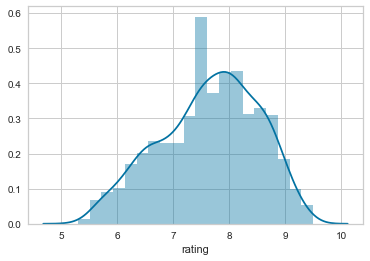

In [15]:
# Rating Distribution
sns.distplot(seattle_venues_rating['rating'],hist=True)

## Pricing and Rating

In [16]:
# Correlation
seattle_venues_PnR_unique = seattle_venues_PnR.drop_duplicates(subset='Venue ID')
print(seattle_venues_PnR_unique[['Venue Price','Venue Rating']].corr())

              Venue Price  Venue Rating
Venue Price      1.000000      0.160481
Venue Rating     0.160481      1.000000


In [17]:
# Descriptive Stats per price level
seattle_venues_PnR_unique[['Venue Price','Venue Rating']].groupby('Venue Price').describe()

Venue Rating                                                 
                   count      mean       std  min   25%   50%    75%  max
Venue Price                                                              
1                  547.0  7.593236  0.844791  5.5  7.00  7.70  8.200  9.4
2                  467.0  7.751606  0.818176  5.6  7.20  7.80  8.400  9.4
3                   89.0  8.024719  0.781357  5.8  7.70  8.20  8.600  9.3
4                   10.0  8.340000  0.505964  7.1  8.25  8.55  8.675  8.7

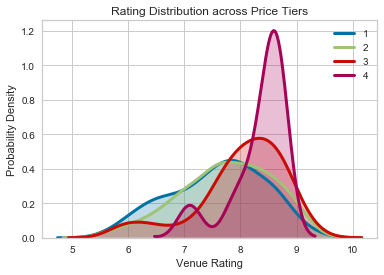

In [18]:
# Price and Rating:
# This is a Probability Density Function (PDF) NOT a Cumulative Density Functions (CDF)
# Therefore the value can be greater than one given a small standard deviation
for price in prices:
    subset = seattle_venues_PnR_unique[seattle_venues_PnR_unique['Venue Price'] == price]
    sns.distplot(subset['Venue Rating'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                       label=price)
    plt.title('Rating Distribution across Price Tiers')
    plt.ylabel('Probability Density')

# K-Means Clustering - Neighborhoods <a name='neigh'></a>

In [19]:
# One hot encoding:
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix=" ",prefix_sep="")

# Bring back Neighborhood
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood']

# Neighborhood as the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

#Quick look
seattle_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Vietnamese Restaurant,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Group by neighborhood and take the mean frequency of each category
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Vietnamese Restaurant,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alki Point,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arbor Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Atlantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ballard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Double checking the shape
seattle_onehot.shape

(3370, 312)

In [22]:
# A function for sorting the venues in descending order based on their frequencies
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
# dataframe with the top ten venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams,Park,Soccer Field,Dog Run,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
1,Alki Point,Beach,Lighthouse,Baseball Field,Baseball Stadium,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
2,Arbor Heights,Park,Brewery,Field,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
3,Atlantic,Light Rail Station,Marijuana Dispensary,Electronics Store,Cheese Shop,Grocery Store,Thrift / Vintage Store,Sporting Goods Shop,Rental Car Location,Food Truck,Fish & Chips Shop
4,Ballard,Food Truck,Jewelry Store,Food & Drink Shop,French Restaurant,Bus Stop,Gift Shop,Baseball Field,Bar,Park,Coffee Shop


In [24]:
# set number of clusters
kclusters = 5

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 3, 1, 1, 1, 1, 1, 3, 1])

In [25]:
# Bring data back together

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = sn

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.head()

,Neighborhood,District,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,Seattle,47.660773,-122.291497,1,Burger Joint,Park,College Science Building,Chinese Restaurant,Brewery,Massage Studio,Golf Driving Range,Donut Shop,Coffee Shop,Gym
1,Broadview,North Seattle,47.722320,-122.360407,1,Convenience Store,Furniture / Home Store,Thai Restaurant,Beer Bar,Sushi Restaurant,Video Store,Pizza Place,Antique Shop,Food Truck,Financial or Legal Service
2,Bitter Lake,North Seattle,47.726236,-122.348764,1,Fast Food Restaurant,ATM,Pet Store,Szechuan Restaurant,Boutique,Sports Bar,Bus Station,Café,Seafood Restaurant,Chinese Restaurant
3,North Beach,North Seattle,47.696210,-122.392362,4,Beach,Scenic Lookout,Park,Floating Market,Falafel Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Flower Shop,Fabric Shop
4,Crown Hill,North Seattle,47.694715,-122.371459,1,Coffee Shop,Flower Shop,Pizza Place,Sports Bar,Grocery Store,Pet Store,Sandwich Place,Burger Joint,Taco Place,Mexican Restaurant


In [26]:
# Visualize Clusters
seattle_lat = 47.6062
seattle_long = -122.3321
map_clusters = folium.Map(location=[seattle_lat, seattle_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Lat'], seattle_merged['Long'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Looking at Each Cluster

In [27]:
# Cluster 0:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Olympic Hills,Playground,Middle Eastern Restaurant,Farmers Market,Zoo Exhibit,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
91,Rainier Beach,Light Rail Station,Deli / Bodega,Plaza,Mexican Restaurant,Playground,Fish Market,Fish & Chips Shop,Financial or Legal Service,Floating Market,Flower Shop
96,Holly Park,Playground,Art Gallery,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
114,Highland Park,Playground,Bar,Baseball Field,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [28]:
# Cluster 1:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,Burger Joint,Park,College Science Building,Chinese Restaurant,Brewery,Massage Studio,Golf Driving Range,Donut Shop,Coffee Shop,Gym
1,Broadview,Convenience Store,Furniture / Home Store,Thai Restaurant,Beer Bar,Sushi Restaurant,Video Store,Pizza Place,Antique Shop,Food Truck,Financial or Legal Service
2,Bitter Lake,Fast Food Restaurant,ATM,Pet Store,Szechuan Restaurant,Boutique,Sports Bar,Bus Station,Café,Seafood Restaurant,Chinese Restaurant
4,Crown Hill,Coffee Shop,Flower Shop,Pizza Place,Sports Bar,Grocery Store,Pet Store,Sandwich Place,Burger Joint,Taco Place,Mexican Restaurant
5,Greenwood,Coffee Shop,Mexican Restaurant,Bar,Bookstore,Spa,Pizza Place,French Restaurant,Theater,Sandwich Place,Event Space
...,...,...,...,...,...,...,...,...,...,...,...
110,Delridge,Gas Station,Pizza Place,Restaurant,Trail,Vietnamese Restaurant,Park,Convenience Store,Financial or Legal Service,Filipino Restaurant,Eastern European Restaurant
111,North Delridge,Gas Station,Pizza Place,Restaurant,Trail,Vietnamese Restaurant,Park,Convenience Store,Financial or Legal Service,Filipino Restaurant,Eastern European Restaurant
112,Pigeon Point,Coffee Shop,Music Venue,Food Truck,Restaurant,Beer Bar,Trail,Grocery Store,Sandwich Place,Bar,Fair
115,South Delridge,Gas Station,Pizza Place,Restaurant,Trail,Vietnamese Restaurant,Park,Convenience Store,Financial or Legal Service,Filipino Restaurant,Eastern European Restaurant


In [29]:
# Cluster 2:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Haller Lake,Park,Coffee Shop,Dance Studio,Lake,Playground,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair
14,Meadowbrook,Pizza Place,Park,Soccer Field,Coffee Shop,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
19,Sand Point,Playground,Soccer Field,Indie Movie Theater,Trail,Convenience Store,Rugby Pitch,Climbing Gym,Park,Floating Market,Food Truck
25,Laurelhurst,Pharmacy,Park,Gift Shop,Café,Bus Stop,Zoo Exhibit,Event Space,Eye Doctor,Fabric Shop,Fair
39,Magnolia,Video Store,Pool,Bus Stop,Bus Station,Fast Food Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
42,Southeast Magnolia,Video Store,Pool,Bus Stop,Bus Station,Fast Food Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
43,Interbay,Bus Stop,Golf Course,Ice Cream Shop,Arts & Crafts Store,Department Store,Playground,Coffee Shop,Pet Store,Electronics Store,Bike Shop
50,Portage Bay,Café,Bus Stop,Music Store,Playground,Park,Eastern European Restaurant,Art Gallery,Boat Rental,Sushi Restaurant,Mexican Restaurant
52,Montlake,Bus Stop,Coffee Shop,Italian Restaurant,Library,Bike Shop,Park,Bus Line,Grocery Store,American Restaurant,Financial or Legal Service
57,Broadmoor,Playground,Garden,Soccer Field,Golf Course,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market


In [30]:
# Cluster 3:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 3, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Matthews Beach,Playground,Trail,Park,Floating Market,Fish Market,Flower Shop,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor
18,View Ridge,Park,Food,Bus Stop,Fast Food Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market
23,Windermere,Greek Restaurant,Park,Pizza Place,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair
30,Green Lake,Park,Trail,Lake,Theater,Tennis Court,Beach,Electronics Store,Event Space,Eye Doctor,Fabric Shop
35,Adams,Park,Soccer Field,Dog Run,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
41,Briarcliff,Trail,Park,Athletics & Sports,Zoo Exhibit,Falafel Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair
54,Interlaken,Park,Scenic Lookout,Playground,Cemetery,Fish & Chips Shop,Fair,Floating Market,Electronics Store,Ethiopian Restaurant,Event Space
84,South End,Park,Trail,Farmers Market,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Fast Food Restaurant
99,South Park,Library,Park,Brewery,Zoo Exhibit,Farmers Market,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
107,Gatewood,Park,Coffee Shop,Print Shop,Pet Store,Gym,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop


In [31]:
# Cluster 4:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 4, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,North Beach,Beach,Scenic Lookout,Park,Floating Market,Falafel Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Flower Shop,Fabric Shop
93,Seward Park,Beach,Bus Station,Zoo Exhibit,Fast Food Restaurant,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Field
101,Alki Point,Beach,Lighthouse,Baseball Field,Baseball Stadium,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant


# K-Means Clustering - Pricing and Ratings <a name='PnR'></a>

In [34]:
# NEW: Get Venue Price Tier Frequency per Neighborhood
seattle_onehot_price = pd.get_dummies(seattle_venues_PnR['Venue Price'], prefix="",prefix_sep="")
seattle_onehot_price['Neighborhood'] = seattle_venues_PnR['Neighborhood']
fixed_columns = [seattle_onehot_price.columns[-1]] + list(seattle_onehot_price.columns[:-1])
seattle_onehot_price = seattle_onehot_price[fixed_columns]
seattle_grouped_price = seattle_onehot_price.groupby('Neighborhood').mean().reset_index()
seattle_grouped_price = seattle_grouped_price.rename(columns={'1':'PT1','2':'PT2','3':'PT3','4':'PT4'})
seattle_venues_PnR = seattle_venues_PnR.merge(seattle_grouped_price, on='Neighborhood', how = 'left')

In [35]:
# Double Check merge:
seattle_venues_PnR.head()

,Venue ID,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Price,Venue Rating,PT1,PT2,PT3,PT4
0,5b538f7e2b9844002ca8dde6,North Seattle,47.660773,-122.291497,Burke-Gilman Brewing Company,47.661308,-122.288067,Brewery,2,8.2,0.454545,0.454545,0.090909,0.0
1,5b538f7e2b9844002ca8dde6,North College Park,47.660773,-122.291497,Burke-Gilman Brewing Company,47.661308,-122.288067,Brewery,2,8.2,0.454545,0.454545,0.090909,0.0
2,4abc357af964a520c98620e3,North Seattle,47.660773,-122.291497,Jak's Grill,47.661072,-122.288073,Steakhouse,3,8.0,0.454545,0.454545,0.090909,0.0
3,4abc357af964a520c98620e3,North College Park,47.660773,-122.291497,Jak's Grill,47.661072,-122.288073,Steakhouse,3,8.0,0.454545,0.454545,0.090909,0.0
4,4af5ed48f964a520eafe21e3,North Seattle,47.660773,-122.291497,Baskin-Robbins,47.661336,-122.292004,Ice Cream Shop,1,7.4,0.454545,0.454545,0.090909,0.0


In [36]:
# Get Venue Average Rating per neighborhood per price tier
seattle_venues_RpP = seattle_venues_PnR.groupby(by=['Neighborhood','Venue Price'])['Venue Rating'].mean().reset_index()
seattle_venues_RpP = seattle_venues_RpP.rename(columns={'Venue Rating':'AVG VR at PT'})

In [37]:
# Set up a multi index
seattle_venues_RpP = seattle_venues_RpP.set_index(['Neighborhood','Venue Price'])
seattle_venues_RpP

AVG VR at PT
Neighborhood     Venue Price              
Atlantic         1                   7.800
Ballard          1                   8.050
                 2                   8.000
                 3                   9.000
Beacon Hill      1                   8.350
...                                    ...
Whittier Heights 1                   7.600
                 2                   8.720
Windermere       1                   8.300
Yesler Terrace   1                   8.175
                 2                   8.300

[228 rows x 1 columns]

In [38]:
seattle_venues_RpP.at[('Atlantic',1),'AVG VR at PT']

7.8

In [39]:
# Add new columns and set to 0
seattle_venues_PnR['AVG VR at PT1'] = 0
seattle_venues_PnR['AVG VR at PT2'] = 0
seattle_venues_PnR['AVG VR at PT3'] = 0
seattle_venues_PnR['AVG VR at PT4'] = 0

In [40]:
# The neighborhoods to iterate off of
neighborhoods = seattle_venues_PnR['Neighborhood'].unique()

In [41]:
# Populates seattle_venues_PnR with average venue rating by neighborhood and price tier
i = 0
for z in neighborhoods:
    if seattle_venues_RpP.index.isin([(z,1)]).any() == True:
        seattle_venues_PnR.loc[seattle_venues_PnR['Neighborhood'] == z, 'AVG VR at PT1'] = seattle_venues_RpP.at[(z,1),'AVG VR at PT']
    if seattle_venues_RpP.index.isin([(z,2)]).any() == True:
        seattle_venues_PnR.loc[seattle_venues_PnR['Neighborhood'] == z, 'AVG VR at PT2'] = seattle_venues_RpP.at[(z,2),'AVG VR at PT']
    if seattle_venues_RpP.index.isin([(z,3)]).any() == True:
        seattle_venues_PnR.loc[seattle_venues_PnR['Neighborhood'] == z, 'AVG VR at PT3'] = seattle_venues_RpP.at[(z,3),'AVG VR at PT']
    if seattle_venues_RpP.index.isin([(z,4)]).any() == True:
        seattle_venues_PnR.loc[seattle_venues_PnR['Neighborhood'] == z, 'AVG VR at PT4'] = seattle_venues_RpP.at[(z,4),'AVG VR at PT']
    i = i + 1

In [42]:
seattle_venues_PnR.head()

,Venue ID,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Price,Venue Rating,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4
0,5b538f7e2b9844002ca8dde6,North Seattle,47.660773,-122.291497,Burke-Gilman Brewing Company,47.661308,-122.288067,Brewery,2,8.2,0.454545,0.454545,0.090909,0.0,7.24,7.28,8.0,0.0
1,5b538f7e2b9844002ca8dde6,North College Park,47.660773,-122.291497,Burke-Gilman Brewing Company,47.661308,-122.288067,Brewery,2,8.2,0.454545,0.454545,0.090909,0.0,7.24,7.28,8.0,0.0
2,4abc357af964a520c98620e3,North Seattle,47.660773,-122.291497,Jak's Grill,47.661072,-122.288073,Steakhouse,3,8.0,0.454545,0.454545,0.090909,0.0,7.24,7.28,8.0,0.0
3,4abc357af964a520c98620e3,North College Park,47.660773,-122.291497,Jak's Grill,47.661072,-122.288073,Steakhouse,3,8.0,0.454545,0.454545,0.090909,0.0,7.24,7.28,8.0,0.0
4,4af5ed48f964a520eafe21e3,North Seattle,47.660773,-122.291497,Baskin-Robbins,47.661336,-122.292004,Ice Cream Shop,1,7.4,0.454545,0.454545,0.090909,0.0,7.24,7.28,8.0,0.0


In [43]:
# One hot encoding:
seattle_onehot_PnR = pd.get_dummies(seattle_venues_PnR[['Venue Category']], prefix=" ",prefix_sep="")

# Bring back Neighborhood
seattle_onehot_PnR['Neighborhood'] = seattle_venues_PnR['Neighborhood']


# Neighborhood as the first column
fixed_columns = [seattle_onehot_PnR.columns[-1]] + list(seattle_onehot_PnR.columns[:-1])
seattle_onehot_PnR = seattle_onehot_PnR[fixed_columns]

#Quick look
seattle_onehot_PnR.head()

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North College Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North College Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
seattle_onehot_PnR.shape

(1744, 91)

In [45]:
# By Neighborhood
seattle_grouped_PnR = seattle_onehot_PnR.groupby('Neighborhood').mean().reset_index()
seattle_grouped_PnR

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Atlantic,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Ballard,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.250000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,Beacon Hill,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.100000,0.000000,...,0.1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,Belltown,0.0,0.028571,0.0,0.0000,0.0,0.0,0.0,0.057143,0.085714,...,0.0,0.0,0.0,0.014286,0.000000,0.0,0.014286,0.028571,0.000000,0.0
4,Bitter Lake,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.083333,0.000000,...,0.0,0.0,0.0,0.083333,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,West Seattle,0.0,0.200000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
90,Westlake,0.0,0.070175,0.0,0.0000,0.0,0.0,0.0,0.035088,0.017544,...,0.0,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.000000,0.017544,0.0
91,Whittier Heights,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.111111,0.111111,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.0
92,Windermere,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [46]:
# To make viewing the top 10 venues easier

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_PnR = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_PnR['Neighborhood'] = seattle_grouped_PnR['Neighborhood']

for ind in np.arange(seattle_grouped_PnR.shape[0]):
    neighborhoods_venues_sorted_PnR.iloc[ind, 1:] = return_most_common_venues(seattle_grouped_PnR.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_PnR.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic,Food Truck,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
1,Ballard,Coffee Shop,French Restaurant,Bar,Food Truck,Wings Joint,Falafel Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop
2,Beacon Hill,Brewery,Bakery,Pub,Coffee Shop,Mexican Restaurant,Mediterranean Restaurant,Café,Taco Place,Pizza Place,Fried Chicken Joint
3,Belltown,Coffee Shop,Breakfast Spot,Bar,Seafood Restaurant,Sushi Restaurant,Bakery,Italian Restaurant,Cocktail Bar,Pizza Place,Restaurant
4,Bitter Lake,Fast Food Restaurant,Noodle House,Donut Shop,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Bakery,Sandwich Place,Seafood Restaurant


In [47]:
# Adding in additional pricing and rating data prior to clustering
seattle_grouped_PnR = seattle_grouped_PnR.merge(seattle_venues_PnR[['Neighborhood','PT1','PT2','PT3','PT4','AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4']], on='Neighborhood', how='left').drop_duplicates().reset_index()
seattle_grouped_PnR.drop(['index'],axis=1,inplace=True)

In [48]:
seattle_grouped_PnR

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Wine Bar,Wings Joint,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4
0,Atlantic,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,7.800000,0.000000,0.000000,0.0
1,Ballard,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.250000,...,0.000000,0.0,0.500000,0.250000,0.250000,0.000000,8.050000,8.000000,9.000000,0.0
2,Beacon Hill,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.100000,0.000000,...,0.000000,0.0,0.600000,0.400000,0.000000,0.000000,8.350000,8.325000,0.000000,0.0
3,Belltown,0.0,0.028571,0.0,0.0000,0.0,0.0,0.0,0.057143,0.085714,...,0.000000,0.0,0.300000,0.528571,0.142857,0.028571,8.219048,8.221622,8.400000,8.3
4,Bitter Lake,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.083333,0.000000,...,0.000000,0.0,0.916667,0.083333,0.000000,0.000000,7.063636,8.900000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,West Seattle,0.0,0.200000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.600000,0.400000,0.000000,0.000000,7.200000,7.450000,0.000000,0.0
90,Westlake,0.0,0.070175,0.0,0.0000,0.0,0.0,0.0,0.035088,0.017544,...,0.017544,0.0,0.438596,0.368421,0.157895,0.035088,8.360000,8.504762,8.177778,8.7
91,Whittier Heights,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.111111,0.111111,...,0.000000,0.0,0.444444,0.555556,0.000000,0.000000,7.600000,8.720000,0.000000,0.0
92,Windermere,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,8.300000,0.000000,0.000000,0.0


# Looking at different feature combinations

In [49]:
# Venues Frequencies only
rest_only = seattle_grouped_PnR.drop(['Neighborhood','PT1','PT2','PT3','PT4','AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4'],1)

# All columns (venue frequencies, price tier frequencies, and avg venue rating per price tier)
all_columns = seattle_grouped_PnR.drop('Neighborhood',1)

# Scaled version on all columns
all_columns_scaled = preprocessing.scale(all_columns)

# All columns excluding ratings
no_rating = seattle_grouped_PnR.drop(['Neighborhood','AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4'],1)

# Manual scale of ratings + all other columns
rating_div10 = all_columns[['AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4']].div(10)
all_rating_scaled = pd.concat([no_rating,rating_div10],axis=1)

# All columns using minmax scaling
all_columns_minmax = preprocessing.minmax_scale(all_columns)
df_all_columns_minmax = pd.DataFrame(all_columns_minmax, columns=all_columns.columns,index=all_columns.index)

# All columns normal, minmax scaling only ratings
rating_minmax = preprocessing.minmax_scale(all_columns[['AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4']])
df_rating_minmax = pd.DataFrame(rating_minmax,columns=['AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4'],index=all_columns.index)
all_rating_minmax = pd.concat([no_rating,df_rating_minmax],axis=1)

In [50]:
# Finding the optimal k
Ks = 11
sil_scores_rest_only = np.zeros((Ks-2))
sil_scores_all_columns = np.zeros((Ks-2))
sil_scores_all_columns_scaled = np.zeros((Ks-2))
sil_scores_no_rating = np.zeros((Ks-2))
sil_scores_all_rating_scaled = np.zeros((Ks-2))
sil_scores_df_all_columns_minmax = np.zeros((Ks-2))
sil_scores_all_rating_minmax = np.zeros((Ks-2))
# You need at least two clusters to obtain a sil_score. Therefore, starting from 2
for n in range(2,Ks):
    
    kmeans_rest_only = KMeans(n_clusters=n, random_state = 0).fit(rest_only)
    sil_scores_rest_only[n-2] = silhouette_score(rest_only, kmeans_rest_only.labels_)
    
    kmeans_all_columns = KMeans(n_clusters=n, random_state = 0).fit(all_columns)
    sil_scores_all_columns[n-2] = silhouette_score(all_columns, kmeans_all_columns.labels_)
    
    kmeans_all_columns_scaled = KMeans(n_clusters=n, random_state = 0).fit(all_columns_scaled)
    sil_scores_all_columns_scaled[n-2] = silhouette_score(all_columns_scaled, kmeans_all_columns_scaled.labels_)
    
    kmeans_no_rating = KMeans(n_clusters=n, random_state = 0).fit(no_rating)
    sil_scores_no_rating[n-2] = silhouette_score(no_rating, kmeans_no_rating.labels_)
    
    kmeans_all_rating_scaled = KMeans(n_clusters=n, random_state = 0).fit(all_rating_scaled)
    sil_scores_all_rating_scaled[n-2] = silhouette_score(all_rating_scaled, kmeans_all_rating_scaled.labels_)
    
    kmeans_df_all_columns_minmax = KMeans(n_clusters=n, random_state = 0).fit(df_all_columns_minmax)
    sil_scores_df_all_columns_minmax[n-2] = silhouette_score(df_all_columns_minmax, kmeans_df_all_columns_minmax.labels_)
    
    kmeans_all_rating_minmax = KMeans(n_clusters=n, random_state = 0).fit(all_rating_minmax)
    sil_scores_all_rating_minmax[n-2] = silhouette_score(all_rating_minmax, kmeans_all_rating_minmax.labels_)

# Evaluating Silhouette Scores
Silhouette score = (b-a) / max(a,b)
a = mean distance to other instances in the same cluster (mean intra-cluster distance)
b = mean nearest cluster distance (mean distance to the instances of the next closest cluster)
All scores range from -1 to 1. The closer to one the better

In [51]:
sil_scores_rest_only

array([0.36291038, 0.3758701 , 0.22249467, 0.38014646, 0.36871717,
       0.4071039 , 0.18978964, 0.32571091, 0.30708664])

In [52]:
sil_scores_all_columns

array([0.50341287, 0.60746295, 0.72510386, 0.77182952, 0.77677644,
       0.78280895, 0.78643766, 0.68233968, 0.562402  ])

In [53]:
sil_scores_all_columns_scaled

array([0.08732273, 0.10829492, 0.04377263, 0.08911301, 0.02406527,
       0.0193963 , 0.07336728, 0.05513454, 0.06453989])

In [54]:
sil_scores_no_rating

array([0.35092893, 0.33547222, 0.31445011, 0.11434081, 0.32883234,
       0.3052806 , 0.14663168, 0.15777523, 0.14424158])

In [55]:
sil_scores_all_rating_scaled

array([0.29521081, 0.32868704, 0.36641253, 0.38999588, 0.3976699 ,
       0.39497796, 0.3956508 , 0.39546041, 0.35557333])

In [56]:
sil_scores_df_all_columns_minmax

array([0.13118538, 0.12359254, 0.11721335, 0.10280818, 0.12499107,
       0.14269881, 0.14844071, 0.14971936, 0.15854121])

In [57]:
sil_scores_all_rating_minmax

array([0.3114131 , 0.34470207, 0.40151605, 0.42504765, 0.4281835 ,
       0.42033319, 0.42612325, 0.37217737, 0.33634707])

All columns is the best! It includes: venue frequencies, price tier frequencies, and average rating per price tier.
Now let's look at a silhouette diagrams to judge the size of our clusters against their performance metric silhouette score

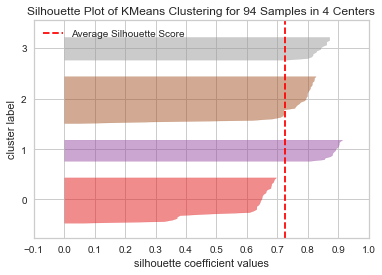

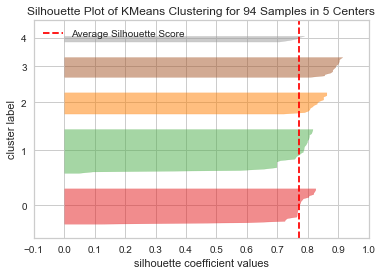

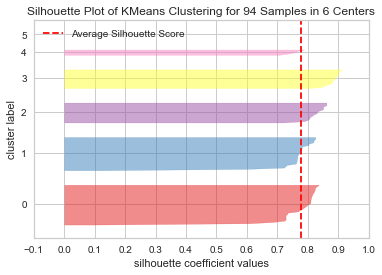

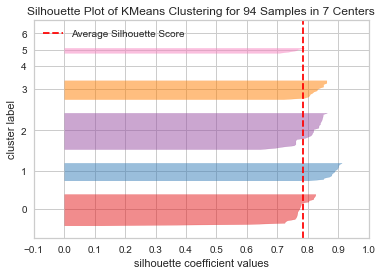

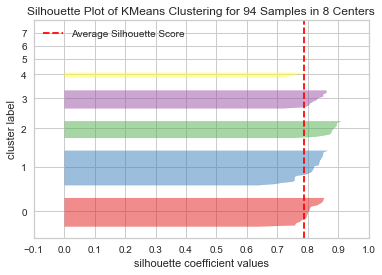

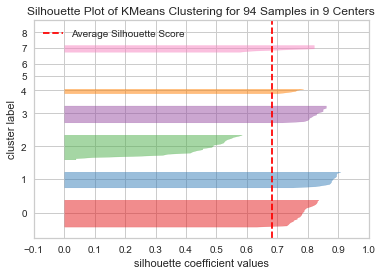

In [58]:
for k in range(4,10):
    kmeans = KMeans(n_clusters=k, random_state = 0).fit(all_columns)
    visualizer = SilhouetteVisualizer(kmeans,color='yellowbrick')
    visualizer.fit(all_columns)
    visualizer.show()

Although models k=5,6,7, and 8 have higher silhouette scores, k = 4 appears to be the best model.
This is because the clusters are almost all the same size. In contrast k = 5 to k = 8 there appears to be extremely small clusters. Thus, it is unlikely that the k = 5 to k = 8 models will react well to new data.

In [59]:
# Using Optimal K and the best model:
# Optimal K = 4
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(all_columns)
silhouette_score(all_columns, kmeans.labels_)

0.7251038573102809

In [60]:
# Bring data back together

# add clustering labels
neighborhoods_venues_sorted_PnR.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged_PnR = seattle_venues_PnR[['Neighborhood','PT1','PT2','PT3','PT4','AVG VR at PT1','AVG VR at PT2','AVG VR at PT3','AVG VR at PT4','Neighborhood Latitude','Neighborhood Longitude']].drop_duplicates().reset_index()
seattle_merged_PnR.drop(['index'], axis=1,inplace=True)

seattle_merged_PnR = seattle_merged_PnR.join(neighborhoods_venues_sorted_PnR.set_index('Neighborhood'), on='Neighborhood')

seattle_merged_PnR.head()

,Neighborhood,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4,Neighborhood Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,0.454545,0.454545,0.090909,0.0,7.240000,7.280000,8.0,0.0,47.660773,...,Burger Joint,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Food Truck,Donut Shop,Steakhouse,Pizza Place,Brewery
1,North College Park,0.454545,0.454545,0.090909,0.0,7.240000,7.280000,8.0,0.0,47.660773,...,Burger Joint,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Food Truck,Donut Shop,Steakhouse,Pizza Place,Brewery
2,University Village,0.580645,0.387097,0.032258,0.0,7.316667,7.508333,8.1,0.0,47.662740,...,Coffee Shop,New American Restaurant,Italian Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Burger Joint,Juice Bar,Frozen Yogurt Shop,Salad Place
3,Broadview,0.500000,0.500000,0.000000,0.0,7.000000,6.800000,0.0,0.0,47.722320,...,Pizza Place,Thai Restaurant,Food Truck,Sushi Restaurant,Wings Joint,Eastern European Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner
4,Bitter Lake,0.916667,0.083333,0.000000,0.0,7.063636,8.900000,0.0,0.0,47.726236,...,Fast Food Restaurant,Noodle House,Donut Shop,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Bakery,Sandwich Place,Seafood Restaurant


In [61]:
# Visualize Clusters
seattle_lat = 47.6062
seattle_long = -122.3321
map_clusters = folium.Map(location=[seattle_lat, seattle_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged_PnR['Neighborhood Latitude'], seattle_merged_PnR['Neighborhood Longitude'], seattle_merged_PnR['Neighborhood'], seattle_merged_PnR['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Looking at each Cluster

In [62]:
# Cluster 0:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 0]

,Neighborhood,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4,Neighborhood Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Broadview,0.500000,0.500000,0.0,0.000000,7.000000,6.800000,0.0,0.0,47.722320,...,Pizza Place,Thai Restaurant,Food Truck,Sushi Restaurant,Wings Joint,Eastern European Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner
4,Bitter Lake,0.916667,0.083333,0.0,0.000000,7.063636,8.900000,0.0,0.0,47.726236,...,Fast Food Restaurant,Noodle House,Donut Shop,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Bakery,Sandwich Place,Seafood Restaurant
5,Crown Hill,0.875000,0.125000,0.0,0.000000,6.785714,8.800000,0.0,0.0,47.694715,...,Sports Bar,Taco Place,Coffee Shop,Sandwich Place,Mexican Restaurant,Burger Joint,Pizza Place,American Restaurant,Food Truck,Fish & Chips Shop
20,Olympic Hills,0.000000,1.000000,0.0,0.000000,0.000000,8.200000,0.0,0.0,47.729900,...,Middle Eastern Restaurant,Wings Joint,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
21,Wedgwood,0.500000,0.500000,0.0,0.000000,7.850000,6.950000,0.0,0.0,47.690253,...,Coffee Shop,Steakhouse,Pub,Gay Bar,Eastern European Restaurant,German Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner
22,Roosevelt,0.428571,0.571429,0.0,0.000000,7.433333,7.400000,0.0,0.0,47.677305,...,Coffee Shop,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Burger Joint,Indian Restaurant,Bar,Breakfast Spot,Thai Restaurant,Pizza Place
29,Wallingford,0.571429,0.428571,0.0,0.000000,7.566667,7.311111,0.0,0.0,47.659463,...,Japanese Restaurant,Coffee Shop,Thai Restaurant,Asian Restaurant,Taco Place,Bakery,Ice Cream Shop,Pub,Bar,Restaurant
34,Whittier Heights,0.444444,0.555556,0.0,0.000000,7.600000,8.720000,0.0,0.0,47.683297,...,Pizza Place,Vietnamese Restaurant,Ice Cream Shop,Cocktail Bar,Bakery,Bar,Breakfast Spot,Caribbean Restaurant,Karaoke Bar,Ethiopian Restaurant
36,Loyal Heights,0.750000,0.250000,0.0,0.000000,7.100000,8.400000,0.0,0.0,47.688709,...,Pizza Place,Middle Eastern Restaurant,Bakery,Mexican Restaurant,Wings Joint,Ethiopian Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop
49,Eastlake,0.571429,0.357143,0.0,0.071429,7.000000,6.980000,0.0,7.1,47.643145,...,Sandwich Place,Coffee Shop,Mexican Restaurant,Bar,Deli / Bodega,Burger Joint,Pizza Place,Steakhouse,Italian Restaurant,Fish & Chips Shop


In [63]:
# Cluster 1
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 1]

,Neighborhood,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4,Neighborhood Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Greenwood,0.423077,0.500000,0.038462,0.038462,7.736364,7.876923,8.400000,8.70,47.690981,...,Coffee Shop,Mexican Restaurant,Bar,Pizza Place,Brewery,Steakhouse,Mediterranean Restaurant,Diner,Lounge,Sandwich Place
9,Pinehurst,0.446154,0.384615,0.153846,0.015385,7.510345,7.532000,7.930000,8.60,47.603832,...,Coffee Shop,Café,Cocktail Bar,Sandwich Place,Japanese Restaurant,Italian Restaurant,Donut Shop,Salad Place,Sushi Restaurant,Pizza Place
10,Downtown,0.454545,0.345455,0.163636,0.036364,7.512000,7.663158,7.866667,8.65,47.604872,...,Coffee Shop,Sandwich Place,Cocktail Bar,Seafood Restaurant,American Restaurant,Pizza Place,Japanese Restaurant,Breakfast Spot,Hot Dog Joint,Caribbean Restaurant
11,Pioneer Square,0.419355,0.370968,0.177419,0.032258,7.823077,7.917391,8.045455,8.60,47.602139,...,Coffee Shop,Cocktail Bar,Café,Seafood Restaurant,Donut Shop,Breakfast Spot,New American Restaurant,Pizza Place,Salad Place,Japanese Restaurant
12,Junction,0.446154,0.384615,0.153846,0.015385,7.510345,7.532000,7.930000,8.60,47.603832,...,Coffee Shop,Café,Cocktail Bar,Sandwich Place,Japanese Restaurant,Italian Restaurant,Donut Shop,Salad Place,Sushi Restaurant,Pizza Place
13,West Edge,0.438596,0.421053,0.105263,0.035088,7.976000,8.216667,7.716667,8.65,47.606340,...,Coffee Shop,Seafood Restaurant,American Restaurant,Sandwich Place,Cocktail Bar,Bar,Sushi Restaurant,Bakery,Café,Noodle House
14,International District,0.431818,0.363636,0.181818,0.022727,7.315789,7.662500,7.675000,8.60,47.602896,...,Seafood Restaurant,Coffee Shop,Burger Joint,Japanese Restaurant,Thai Restaurant,Cocktail Bar,New American Restaurant,Mediterranean Restaurant,Salad Place,Sake Bar
46,Capitol Hill,0.314286,0.571429,0.085714,0.028571,8.300000,8.005000,7.900000,8.40,47.623831,...,Coffee Shop,American Restaurant,Cocktail Bar,Italian Restaurant,Mexican Restaurant,Japanese Restaurant,Bar,Wine Bar,Lounge,Korean Restaurant
54,Madison Valley,0.230769,0.538462,0.153846,0.076923,7.200000,7.900000,8.500000,8.20,47.619916,...,French Restaurant,Italian Restaurant,Japanese Restaurant,Spanish Restaurant,Bar,Sushi Restaurant,Southern / Soul Food Restaurant,Dessert Shop,Coffee Shop,Vegetarian / Vegan Restaurant
57,South Lake Union,0.603774,0.320755,0.056604,0.018868,7.671875,7.794118,7.000000,8.50,47.623161,...,Coffee Shop,Food Truck,Mexican Restaurant,American Restaurant,Café,BBQ Joint,Gastropub,Vegetarian / Vegan Restaurant,Breakfast Spot,Bar


In [64]:
# Cluster 2:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 2]

,Neighborhood,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4,Neighborhood Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North Seattle,0.454545,0.454545,0.090909,0.0,7.240000,7.280000,8.000000,0.0,47.660773,...,Burger Joint,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Food Truck,Donut Shop,Steakhouse,Pizza Place,Brewery
1,North College Park,0.454545,0.454545,0.090909,0.0,7.240000,7.280000,8.000000,0.0,47.660773,...,Burger Joint,Coffee Shop,Ice Cream Shop,Thai Restaurant,Chinese Restaurant,Food Truck,Donut Shop,Steakhouse,Pizza Place,Brewery
2,University Village,0.580645,0.387097,0.032258,0.0,7.316667,7.508333,8.100000,0.0,47.662740,...,Coffee Shop,New American Restaurant,Italian Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Burger Joint,Juice Bar,Frozen Yogurt Shop,Salad Place
15,First Hill,0.620690,0.344828,0.034483,0.0,7.161111,7.010000,8.200000,0.0,47.609305,...,Sandwich Place,Coffee Shop,Asian Restaurant,Pizza Place,Indian Restaurant,Restaurant,Italian Restaurant,Snack Place,Donut Shop,Speakeasy
16,Maple Leaf,0.571429,0.285714,0.142857,0.0,8.000000,7.750000,8.800000,0.0,47.693987,...,Coffee Shop,Hawaiian Restaurant,Cocktail Bar,Chinese Restaurant,Dive Bar,Cupcake Shop,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant
17,Lake City,0.500000,0.444444,0.055556,0.0,7.033333,7.900000,8.200000,0.0,47.719162,...,Mexican Restaurant,Thai Restaurant,Sushi Restaurant,Sandwich Place,Burger Joint,Breakfast Spot,Chinese Restaurant,Bar,Gastropub,Café
23,Ravenna,0.222222,0.666667,0.111111,0.0,7.650000,7.500000,7.600000,0.0,47.675654,...,Mediterranean Restaurant,Coffee Shop,American Restaurant,Creperie,New American Restaurant,Café,Sushi Restaurant,Southern / Soul Food Restaurant,Eastern European Restaurant,Dessert Shop
25,Hawthorne Hills,0.500000,0.000000,0.500000,0.0,6.400000,0.000000,8.200000,0.0,47.672043,...,American Restaurant,Café,Wings Joint,Fast Food Restaurant,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
27,University District,0.544118,0.441176,0.014706,0.0,7.243243,7.390000,6.500000,0.0,47.661298,...,Coffee Shop,Chinese Restaurant,Vietnamese Restaurant,Korean Restaurant,Café,Indian Restaurant,Sandwich Place,Japanese Restaurant,Falafel Restaurant,Brewery
28,Stevens,0.541667,0.416667,0.041667,0.0,7.207692,7.530000,7.700000,0.0,47.654349,...,Coffee Shop,Vietnamese Restaurant,Korean Restaurant,Sandwich Place,Pub,Brewery,Mexican Restaurant,Pizza Place,Dessert Shop,Diner


In [65]:
# Cluster 3:
seattle_merged_PnR.loc[seattle_merged_PnR['Cluster Labels'] == 3]

,Neighborhood,PT1,PT2,PT3,PT4,AVG VR at PT1,AVG VR at PT2,AVG VR at PT3,AVG VR at PT4,Neighborhood Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Northgate,1.0,0.0,0.0,0.0,6.620000,0.0,0.0,0.0,47.713153,...,Greek Restaurant,Coffee Shop,Ice Cream Shop,Pizza Place,Taco Place,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar
8,Haller Lake,1.0,0.0,0.0,0.0,6.800000,0.0,0.0,0.0,47.719748,...,Coffee Shop,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
18,Cedar Park,1.0,0.0,0.0,0.0,7.100000,0.0,0.0,0.0,47.725653,...,Vietnamese Restaurant,Wings Joint,Falafel Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant
19,Meadowbrook,1.0,0.0,0.0,0.0,7.100000,0.0,0.0,0.0,47.705616,...,Pizza Place,Wings Joint,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
24,Windermere,1.0,0.0,0.0,0.0,8.300000,0.0,0.0,0.0,47.670932,...,Pizza Place,Wings Joint,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
26,Laurelhurst,1.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,47.663432,...,Café,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
37,Central Seattle,1.0,0.0,0.0,0.0,8.076923,0.0,0.0,0.0,47.612694,...,Coffee Shop,Burger Joint,Ice Cream Shop,Donut Shop,Taco Place,Bar,Food Truck,Deli / Bodega,Café,Ethiopian Restaurant
38,Central Waterfront,1.0,0.0,0.0,0.0,8.076923,0.0,0.0,0.0,47.612694,...,Coffee Shop,Burger Joint,Ice Cream Shop,Donut Shop,Taco Place,Bar,Food Truck,Deli / Bodega,Café,Ethiopian Restaurant
39,Central Area,1.0,0.0,0.0,0.0,8.076923,0.0,0.0,0.0,47.612694,...,Coffee Shop,Burger Joint,Ice Cream Shop,Donut Shop,Taco Place,Bar,Food Truck,Deli / Bodega,Café,Ethiopian Restaurant
40,Interbay,1.0,0.0,0.0,0.0,7.100000,0.0,0.0,0.0,47.640742,...,Ice Cream Shop,Wings Joint,Falafel Restaurant,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


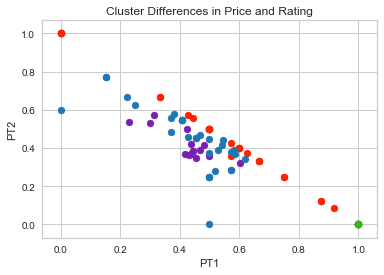

In [89]:
# Scatter, Color of clusters in the same as before
clusters = [0,1,2,3]
colors = ['#ff2200','#781fb4','#1f77b4','#38b41f']
for cluster in clusters:
    subset = seattle_merged_PnR[seattle_merged_PnR['Cluster Labels'] == cluster]
    plt.scatter(subset['PT1'],subset['PT2'],c=colors[cluster])
    plt.xlabel('PT1')
    plt.ylabel('PT2')
    plt.title('Cluster Differences in Price and Rating')